# Innlevering 5


In [111]:
from random import sample

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy import stats

## Oppgave 3


SAR (Synthetic Aperture Radar) er en målemetode som benyttes for å kartlegge jordoverflaten fra satelitt. Teknikken går kort fortalt ut på at man sender ut radarstråler fra satelitten og observerer hvor mye av denne strålingen som reflekteres tilbake. Hvor mye av radarstrålingen som reflekteres, avhenger av egenskapene til jordoverflaten på den aktuelle posisjonen og dermed kan man skille mellom ulike overflatetyper. En observasjon gjøres egentlig ved at man tar flere målinger (såkalte “looks”) og summerer disse. Ut fra fysiske lover for radarstråler er det kjent at en observasjon, $X$, vil være gammafordelt med parametre $\alpha=a$ og $\beta = r/a$, dvs. sannsynlighetstettheten er gitt ved

\begin{align*}
f(x) = \frac{a^a}{r^a\Gamma(a)}x^{a-1}\exp\left\{-\frac{ax}{r}\right\}, \,\,x\geq 0,
\end{align*}

der $a$ er antall “looks” og refleksivitetsparameteren $r$ er en størrelse som beskriver refleksjonsegenskapene til jordoverflaten der observasjonen gjøres. Ut fra kjente formler for forventningsverdi og varians for gammafordelingen vet vi dermed også at tilhørende forventningsverdi og varians er gitt ved

\begin{align*}
E[X] = r\,\,\,\,\,\mbox{og}\,\,\,\,\,\,\mbox{Var}[X]=\frac{r^2}{a}.
\end{align*}

Vi skal nå anta at vi har $n$ observasjoner fra et homogent område (dvs. verdien på $r$ er den samme for alle de $n$ observasjonene). La $X_1, X_2,\ldots, X_n$ være de $n$ observasjonene og anta at de er uavhengige. Fra disse observasjonene er vi interessert i å estimere $r$. Antall “looks”, $a=5$, antar vi kjent. Som estimator for $r$ skal vi benytte

\begin{align*}
\hat{r}=\overline{X} = \frac{1}{n}\sum\_{i=1}^n X_i.
\end{align*}


Vi fokuserer nå på et område hvor det er kjent at det for et år siden var en overflatetype som hadde refleksjonsparameter $r_0=12.5$. For å undersøke om overflaten har endret seg siden i fjor på en slik måte at refleksjonsparameteren har økt, gjøres det $n=20$ målinger med $a=5$ looks fra det aktuelle området. De $n=20$ observerte verdiene er som følger:

\begin{align*}
&7.98,10.82,15.88,17.00,24.22,12.20,8.17,16.53,7.46,14.31,34.55,\\
&19.46,20.21,13.58,10.98,4.42,24.92,30.29,23.45,23.36
\end{align*}

Vi ønsker nå å benytte disse verdiene til å undersøke om det er grunnlag til å påstå at verdien til refleksjonsparameterem har økt siden i fjor.

Videre i oppgaven skal vi forutsette at $n=20$ observasjoner er tilstrekkelig til at normalapproksimasjonen diskutert i deloppgave a) er god, slik at du kan benytte denne i dine videre beregninger.


### Deloppgave b)

For å få et første inntrykk at de $n=20$ observerte verdiene, bruk verdiene til å lage følgende plott i python

- histogram
- boksplott (for dette kan du bruke funksjonen boxplot i modulen matplotlib.pyplot)

Ut fra hva du ser i plottene, hva tror du om verdien av refleksjonsparameteren i år i forhold til i fjor? Tror du det er grunnlag for å påstå at verdien har økt siden i fjor?


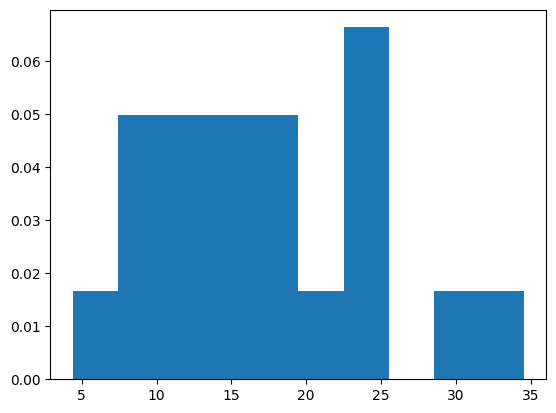

In [112]:
values = [
    7.98,
    10.82,
    15.88,
    17.00,
    24.22,
    12.20,
    8.17,
    16.53,
    7.46,
    14.31,
    34.55,
    19.46,
    20.21,
    13.58,
    10.98,
    4.42,
    24.92,
    30.29,
    23.45,
    23.36,
]
plt.hist(values, bins=10, density=True)
plt.show()

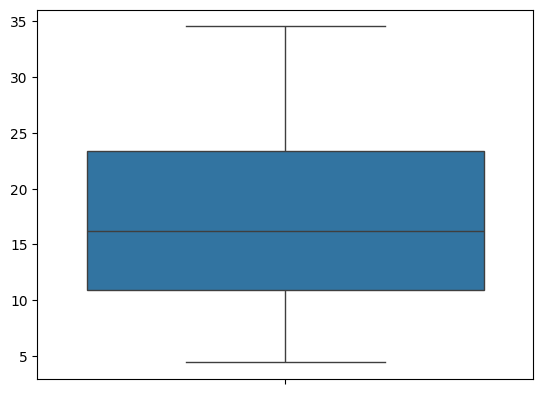

In [113]:
sns.boxplot(values)
plt.show()

In [114]:
print(f"Gjennomsnitt: {np.mean(values)}")
print(
    "Ser at gjennomsnittet er større enn r_0, som er lik 12.5. Dermed kan "
    "dette bety at verdien for refleksjonsparameteren har økt."
)

Gjennomsnitt: 16.9895
Ser at gjennomsnittet er større enn r_0, som er lik 12.5. Dermed kan dette bety at verdien for refleksjonsparameteren har økt.


### Deloppgave e)

Skriv en python-funksjon som først simulerer $n=20$ "observasjoner" fra gammafordelingen som gjelder når $H_0$ er sann, og deretter benytter disse observasjonene til å evaluere og returnere verdien til den tilhørende testobservatoren. <em>Merk: For å generere realisasjoner fra en gammafordeling kan du benytte funksjonen gamma i modulen numpy.random. Se mappen "Fordelinger" i JupyterHub for eksempel på bruk av funksjonen.</em>

Benytt så denne python-funksjonen, for eksempel $m=100\, 000$ ganger, til å estimere testens eksakte sannsynlighet for type I-feil. Finn også et $95\%$-konfidensintervall for den eksakte sannsynligheten for type I-feil. Basert på resultatene du har fått her, hva tenker du om kvaliteten av approksimasjonen du gjorde da du i deloppgave c) regnet som om testobservatoren var standard normalfordelt under $H_0$?


In [115]:
def r_i(m: int) -> np.ndarray:
    alpha = a
    beta = r_0 / a
    return np.random.gamma(alpha, beta, m)


def r_hat(x: np.ndarray) -> np.floating:
    return np.mean(x)


r_0 = 12.5
a = 5.0
n = 20
m = 100_000
k = r_0 + stats.norm.ppf(0.9) * r_0 / np.sqrt(n * a)  # fra 3c

observed_values = np.array([r_hat(r_i(n)) for _ in range(m)])
alpha = np.mean(observed_values >= k)
print(f"P(Type I-feil): {alpha:.4f}")

P(Type I-feil): 0.1040


In [116]:
# p^ = X/n
# Var(p^) = Var(X/n) = 1/n^2 * Var(X) = 1/n^2 * n*p*(1-p) = p*(1-p)/n
sigma = np.sqrt(alpha * (1 - alpha) / m)
z_alpha = stats.norm.ppf(1 - 0.05 / 2)

interval = [alpha - z_alpha * sigma, alpha + z_alpha * sigma]

print(f"Intervall: {[round(num, 4) for num in interval]}")
print(
    "Approksimasjonen er nærme den eksakte verdien, så det er en god "
    "tilnærming. Dette betyr at vi kan stole på at vi har en god "
    "tilnærming til P(Type I-feil)."
)

Intervall: [0.1021, 0.1059]
Approksimasjonen er nærme den eksakte verdien, så det er en god tilnærming. Dette betyr at vi kan stole på at vi har en god tilnærming til P(Type I-feil).


## Oppgave 4


Anta at man har gjennomført en medisinsk studie for å vurdere om en ny medisin for en bestemt sykdom er bedre enn den tradisjonelle medisinen som har vært benyttet for denne sykdommen. Det var $n=15$ pasienter som deltok i studien. Av disse $n$ pasientene ble $m=7$ tilfeldig trukket ut og disse $m$ pasientene ble gitt den nye medisinen. De øvrige $n-m=8$ pasientene fikk den gamle medisinen.

Effekten av behandlingen (medisinen) kan måles ved hjelp av en blodprøve. Vi skal i denne oppgaven anta at en lav blodprøveverdi er en indikasjon på at medisinen som er gitt har hatt en god effekt. Jo lavere blodprøveverdien er, jo bedre har effekten av medisinen vært.

I denne oppgaven ønsker vi å bruke følgende observerte blodprøveverdier til å vurdere om det er grunnlag for å påstå at den nye medisinen er mer effektiv enn den gamle.

| Tradisjonell medisin |     0.189 |     0.743 |     0.605 |     0.044 |     0.091 |     0.045 |     0.532 | 0.642 |
| :------------------- | --------: | --------: | --------: | --------: | --------: | --------: | --------: | ----: |
| **Ny medisin**       | **0.397** | **0.583** | **0.355** | **0.054** | **0.155** | **0.066** | **0.099** |       |

Vi skal formulere problemet som en hypotesetest og som testobservator skal vi benytte gjennomsnittet av observerte blodprøveverdier for pasienter som fikk ny medisin minus gjennomsnittet av observerte blodprøveverdier for pasienter som fikk den tradisjonelle medisinen.


### Deloppgave a)

For å få et første inntrykk at de observerte verdiene, lag et boksplott for observerte blodprøveverdiene for pasientene som fikk tradisjonell medisin, og et boksplott for observerte blodprøveverdier for pasienter som fikk ny medisin. <em>Hint: Jobben blir gjort ved å kjøre koden under. Du trenger ikke endre på den gitte koden.</em>


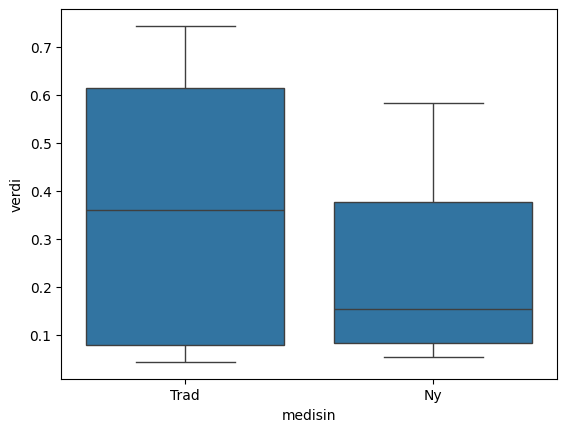

In [117]:
x = [
    0.189,
    0.743,
    0.605,
    0.044,
    0.091,
    0.045,
    0.532,
    0.642,
    0.397,
    0.583,
    0.355,
    0.054,
    0.155,
    0.066,
    0.099,
]
data = DataFrame(
    {
        "verdi": x,
        "medisin": [
            "Trad",
            "Trad",
            "Trad",
            "Trad",
            "Trad",
            "Trad",
            "Trad",
            "Trad",
            "Ny",
            "Ny",
            "Ny",
            "Ny",
            "Ny",
            "Ny",
            "Ny",
        ],
    }
)

sns.boxplot(x="medisin", y="verdi", data=data)
plt.show()

In [118]:
print(
    "Basert på boksen ser det ut til at den nye medisinen er gir bedre effekt "
    "enn den tradisjonelle. Dette er siden gjennomsnittet er betraktelig "
    "lavere for den nye."
)

Basert på boksen ser det ut til at den nye medisinen er gir bedre effekt enn den tradisjonelle. Dette er siden gjennomsnittet er betraktelig lavere for den nye.


Ut fra hva du ser i disse to boksplottene, tenker du at det er grunnlag for å påstå at den nye medisinen gir bedre effekt enn den tradisjonelle? Gi argumenter for ditt svar.

#### Deloppgave b)

Formuler nullhypotese $H_0$ og alternativ hypotese $H_1$ for problemstillingen beskrevet i innledningen til oppgaven.

Bestem hvilken beslutningsregel det er rimelig å bruke. <em>Merk: Du trenger ikke å finne kritisk verdi, bare bestemme om man skal forkaste $H_0$ når testobservatoren er stor nok, om man skal forkaste $H_0$ når testobservatoren er liten nok, eller om man bør ha et tosidig forkastningskriterium.</em>

Skriv og kjør python-kode som bruker stokastiske simulering til å estimere p-verdien i en permutasjonstest når observasjonene er som gitt over. Benytt gjerne $m=10\, 000$ simuleringer for å estimere p-verdien. <em>Hint: Koden under regner ut observert verdi av testobservatoren og <b>en</b> simulert verdi av denne. Du er nødt til å modifisere denne koden slik at den gjør det som det spørres om.</em>


In [119]:
print("H_0: μ_n - μ_t = 0")
print("H_1: μ_n - μ_t < 0")
print("Ensidig hypotesetest, der H_0 forkastes hvis μ_n - μ_t er lav nok.")

H_0: μ_n - μ_t = 0
H_1: μ_n - μ_t < 0
Ensidig hypotesetest, der H_0 forkastes hvis μ_n - μ_t er lav nok.


In [120]:
def test_statistic(x: list[float], n_trad: int) -> np.floating:
    mean_trad = np.mean(x[:n_trad])
    mean_new = np.mean(x[n_trad:])
    return mean_new - mean_trad


n = len(x)
n_trad = 8
m = 10_000

statistic_observed = test_statistic(x, n_trad)
print(f"Observert verdi: {statistic_observed:.4f}")

statistic_simulated = [test_statistic(sample(x, n), n_trad) for _ in range(m)]
p_hat = (1 + sum(statistic_simulated <= statistic_observed)) / (m + 1)
print(f"p-verdi: {p_hat:.4f}")

Observert verdi: -0.1172
p-verdi: 0.1924
